In [35]:
import pandas as pd
import numpy as np
from sklearn import ensemble

In [27]:
loans = pd.read_csv('lending-club-data.csv')

In [29]:
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
loans = loans[loans.columns.drop('bad_loans')]

In [30]:
target = 'safe_loans'
features = ['grade',                     # grade of the loan (categorical)
            'sub_grade_num',             # sub-grade of the loan as a number from 0 to 1
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'payment_inc_ratio',         # ratio of the monthly payment to income
            'delinq_2yrs',               # number of delinquincies
             'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
            'int_rate',                  # interest rate of the loan
            'total_rec_int',             # interest received to date
            'annual_inc',                # annual income of borrower
            'funded_amnt',               # amount committed to the loan
            'funded_amnt_inv',           # amount committed by investors for the loan
            'installment',               # monthly payment owed by the borrower
           ]

In [31]:
loans = loans[features + [target]].dropna()
loans = pd.get_dummies(loans)

In [32]:
loans.head(2)

,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,last_major_derog_none,...,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding
0,0.4,0,11,27.65,8.1435,0.0,1.0,1.0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0.8,1,1,1.00,2.3932,0.0,1.0,5.0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
train_idx = pd.read_json('module-8-assignment-1-train-idx.json')[0]
validation_idx = pd.read_json('module-8-assignment-1-validation-idx.json')[0]

In [34]:
train_data = loans.iloc[train_idx]
validation_data = loans.iloc[validation_idx]

In [39]:
model_5 = ensemble.GradientBoostingClassifier(max_depth=6, n_estimators=5)

In [40]:
model_5.fit(train_data[train_data.columns.drop('safe_loans')].values,train_data['safe_loans'].values)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=5,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [41]:
validation_safe_loans = validation_data[validation_data[target] == 1]
validation_risky_loans = validation_data[validation_data[target] == -1]

sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data

,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,last_major_derog_none,...,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding
22,0.2,0,3,29.44,6.30496,0.0,1.0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0
26,0.6,1,1,12.19,13.49520,0.0,1.0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0
24,0.4,0,3,13.97,2.96736,3.0,0.0,0.0,0,1,...,0,0,0,0,0,0,1,0,0,0
41,1.0,0,11,16.33,1.90524,0.0,1.0,0.0,1,1,...,1,0,0,0,0,0,0,0,0,0


In [44]:
model_5.predict(sample_validation_data[sample_validation_data.columns.drop('safe_loans')].values)

array([ 1,  1, -1,  1])

In [45]:
sample_validation_data['safe_loans']

22    1
26    1
24   -1
41   -1
Name: safe_loans, dtype: int64

In [46]:
model_5.predict_proba(sample_validation_data[sample_validation_data.columns.drop('safe_loans')].values)

array([[0.41642331, 0.58357669],
       [0.46949689, 0.53050311],
       [0.53807792, 0.46192208],
       [0.39591639, 0.60408361]])

In [47]:
model_5.score(validation_data[validation_data.columns.drop('safe_loans')].values,
              validation_data['safe_loans'].values)

0.6612451529513141

In [48]:
validation_data['gb_pred'] = model_5.predict(validation_data[validation_data.columns.drop('safe_loans')].values)

/Users/mac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
np.sum((validation_data['gb_pred']==1)&(validation_data['safe_loans']==-1))

1654

In [ ]:
np.sum((validation_data['gb_pred']==1)&(validation_data['safe_loans']==-1))

In [50]:
np.sum((validation_data['gb_pred']==-1)&(validation_data['safe_loans']==1))

1491

In [51]:
validation_data['proba'] = model_5.predict_proba(validation_data[validation_data.
                                                                 columns.drop(['safe_loans','gb_pred'])].values)[:,1]

/Users/mac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
validation_data.sort_values('proba',ascending=False)

,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,last_major_derog_none,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,gb_pred,proba
8021,0.4,0,4,12.73,12.16700,0.0,1.0,1.0,1,1,...,0,0,0,0,0,0,0,0,1,0.673059
15960,0.4,0,7,6.10,4.56000,0.0,1.0,1.0,1,1,...,0,0,0,0,1,0,0,0,1,0.661468
81153,0.4,0,3,2.69,2.94760,0.0,1.0,1.0,1,1,...,0,0,0,0,0,0,0,0,1,0.661468
2902,0.2,0,3,6.33,2.53633,0.0,1.0,1.0,1,1,...,0,0,0,0,1,0,0,0,1,0.661468
7650,0.2,0,11,8.73,7.49691,0.0,1.0,0.0,1,1,...,0,0,0,0,0,0,0,0,1,0.661468
3489,0.4,0,7,11.08,2.24278,0.0,1.0,0.0,1,1,...,0,0,0,0,0,0,0,0,1,0.661468
109114,0.6,0,9,12.53,11.13550,1.0,0.0,1.0,0,1,...,0,0,0,0,0,0,0,0,1,0.661468
4545,0.2,0,11,5.01,2.21353,0.0,1.0,0.0,0,1,...,0,1,0,0,0,0,0,0,1,0.661468
49070,0.2,0,11,5.33,5.77226,0.0,1.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0.661468
4690,0.2,0,6,9.07,5.21760,0.0,1.0,0.0,1,1,...,0,0,0,0,0,0,0,0,1,0.661468


In [53]:
model_10 = ensemble.GradientBoostingClassifier(max_depth=6, n_estimators=10)
model_50 = ensemble.GradientBoostingClassifier(max_depth=6, n_estimators=50)
model_100 = ensemble.GradientBoostingClassifier(max_depth=6, n_estimators=100)
model_200 = ensemble.GradientBoostingClassifier(max_depth=6, n_estimators=200)
model_500 = ensemble.GradientBoostingClassifier(max_depth=6, n_estimators=500)

model_10.fit(train_data[train_data.columns.drop('safe_loans')].values,train_data['safe_loans'].values)
model_50.fit(train_data[train_data.columns.drop('safe_loans')].values,train_data['safe_loans'].values)
model_100.fit(train_data[train_data.columns.drop('safe_loans')].values,train_data['safe_loans'].values)
model_200.fit(train_data[train_data.columns.drop('safe_loans')].values,train_data['safe_loans'].values)
model_500.fit(train_data[train_data.columns.drop('safe_loans')].values,train_data['safe_loans'].values)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [63]:
print(model_10.score(validation_data[validation_data.columns.drop(['safe_loans','gb_pred','proba'])].values,validation_data['safe_loans'].values))
print(model_50.score(validation_data[validation_data.columns.drop(['safe_loans','gb_pred','proba'])].values,validation_data['safe_loans'].values))
print(model_100.score(validation_data[validation_data.columns.drop(['safe_loans','gb_pred','proba'])].values,validation_data['safe_loans'].values))
print(model_200.score(validation_data[validation_data.columns.drop(['safe_loans','gb_pred','proba'])].values,validation_data['safe_loans'].values))
print(model_500.score(validation_data[validation_data.columns.drop(['safe_loans','gb_pred','proba'])].values,validation_data['safe_loans'].values))

0.6654459284791039
0.6851572598018095
0.6895734597156398
0.6859112451529513
0.690973718224903


In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
def make_figure(dim, title, xlabel, ylabel, legend):
    plt.rcParams['figure.figsize'] = dim
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend is not None:
        plt.legend(loc=legend, prop={'size':15})
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

In [60]:
train_err_10 = (model_10.score(train_data[train_data.columns.drop('safe_loans')].values,train_data['safe_loans'].values))
train_err_50 = (model_50.score(train_data[train_data.columns.drop('safe_loans')].values,train_data['safe_loans'].values))
train_err_100 = (model_100.score(train_data[train_data.columns.drop('safe_loans')].values,train_data['safe_loans'].values))
train_err_200 = (model_200.score(train_data[train_data.columns.drop('safe_loans')].values,train_data['safe_loans'].values))
train_err_500 = (model_500.score(train_data[train_data.columns.drop('safe_loans')].values,train_data['safe_loans'].values))
training_errors = [train_err_10, train_err_50, train_err_100, train_err_200, train_err_500]

In [61]:
validation_err_10 = (model_10.score(validation_data[validation_data.columns.drop(['safe_loans','gb_pred','proba'])].values,validation_data['safe_loans'].values))
validation_err_50 = (model_50.score(validation_data[validation_data.columns.drop(['safe_loans','gb_pred','proba'])].values,validation_data['safe_loans'].values))
validation_err_100 = (model_100.score(validation_data[validation_data.columns.drop(['safe_loans','gb_pred','proba'])].values,validation_data['safe_loans'].values))
validation_err_200 = (model_200.score(validation_data[validation_data.columns.drop(['safe_loans','gb_pred','proba'])].values,validation_data['safe_loans'].values))
validation_err_500 =(model_500.score(validation_data[validation_data.columns.drop(['safe_loans','gb_pred','proba'])].values,validation_data['safe_loans'].values))
validation_errors = [validation_err_10, validation_err_50, validation_err_100, validation_err_200, validation_err_500]

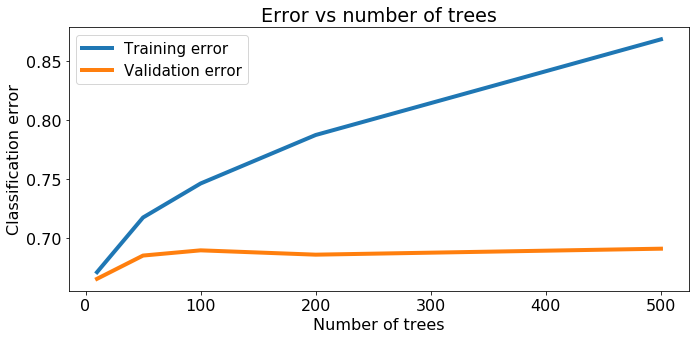

In [62]:
plt.plot([10, 50, 100, 200, 500], training_errors, linewidth=4.0, label='Training error')
plt.plot([10, 50, 100, 200, 500], validation_errors, linewidth=4.0, label='Validation error')

make_figure(dim=(10,5), title='Error vs number of trees',
            xlabel='Number of trees',
            ylabel='Classification error',
            legend='best')